In [172]:
import numpy as np
import pandas as pd

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
#players = pd.read_csv("https://raw.githubusercontent.com/Jit-12/FIFA-World-Cup-Data-Analysis-/master/WorldCupPlayers.csv")

In [175]:
matches = pd.read_csv("https://raw.githubusercontent.com/Jit-12/FIFA-World-Cup-Data-Analysis-/master/WorldCupMatches.csv")

In [176]:
cups = pd.read_csv("https://raw.githubusercontent.com/Jit-12/FIFA-World-Cup-Data-Analysis-/master/WorldCups.csv")

In [177]:
matches.sample(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
3005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# DATA  CLEANING

In [178]:
matches.Datetime = matches.Datetime.astype(np.datetime64)
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  852 non-null    float64       
 1   Datetime              852 non-null    datetime64[ns]
 2   Stage                 852 non-null    object        
 3   Stadium               852 non-null    object        
 4   City                  852 non-null    object        
 5   Home Team Name        852 non-null    object        
 6   Home Team Goals       852 non-null    float64       
 7   Away Team Goals       852 non-null    float64       
 8   Away Team Name        852 non-null    object        
 9   Win conditions        852 non-null    object        
 10  Attendance            850 non-null    float64       
 11  Half-time Home Goals  852 non-null    float64       
 12  Half-time Away Goals  852 non-null    float64       
 13  Referee           

In [179]:
# All the rows after this index are null 
matches.drop(matches.index[852:],inplace=True)

In [180]:
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,2014-07-05 17:00:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,2014-07-08 17:00:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,2014-07-09 17:00:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,2014-07-12 17:00:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


In [181]:
matches.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              2
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [182]:
cups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [183]:
matches['Home Team Name'].unique()

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Germany FR', 'Turkey',
       'Soviet Union', 'Northern Ireland', 'Mexico', 'Wales', 'Portugal',
       'Korea DPR', 'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire',
       'Poland', 'Australia', 'Scotland', 'Netherlands', 'Haiti',
       'Tunisia', 'Algeria', 'Honduras', 'Canada', 'Morocco',
       'Korea Republic', 'Iraq', 'Denmark', 'rn">United Arab Emirates',
       'Costa Rica', 'Cameroon', 'rn">Republic of Ireland', 'Colombia',
       'Norway', 'Nigeria', 'Saudi Arabia', 'Bolivia', 'Russia', 'Greece',
       'Jamaica', 'South Africa', 'Japan', 'Croatia', 'China PR',
       'Senegal', 'Slovenia', 'Ecuador', 'rn">Trinidad and Tobago',
       'rn">Serbia and Montenegro', 'Angola', 'Czech Republic', 'Togo',
       'Iran', "C�te d'Ivoire", 'Ghana

In [184]:
values = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()

In [185]:
values

rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: Home Team Name, dtype: int64

In [186]:
wrong = list(values.index)

In [187]:
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [188]:
correct = []
for i in wrong:
    correct.append(i.split('>')[1])

In [189]:
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [190]:
wrong = wrong + ['Germany FR','German DR',"C�te d'Ivoire"]

In [191]:
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina',
 'Germany FR',
 'German DR',
 "C�te d'Ivoire"]

In [192]:
correct = correct + ['Germany','Germany','Ivory Coast']

In [193]:
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina',
 'Germany',
 'Germany',
 'Ivory Coast']

In [194]:
matches.replace(wrong,correct,inplace=True)

In [195]:
matches['Away Team Name'].unique()

array(['Mexico', 'Belgium', 'Brazil', 'Peru', 'France', 'Bolivia',
       'Paraguay', 'Romania', 'Chile', 'USA', 'Yugoslavia', 'Argentina',
       'Egypt', 'Netherlands', 'Switzerland', 'Sweden', 'Spain',
       'Hungary', 'Austria', 'Germany', 'Czechoslovakia',
       'Dutch East Indies', 'Norway', 'Poland', 'Cuba', 'Italy',
       'England', 'Scotland', 'Turkey', 'Korea Republic', 'Uruguay',
       'Wales', 'Northern Ireland', 'Soviet Union', 'Colombia',
       'Bulgaria', 'Korea DPR', 'Portugal', 'Israel', 'Morocco',
       'El Salvador', 'Australia', 'Haiti', 'Zaire', 'IR Iran', 'Tunisia',
       'Iran', 'Cameroon', 'New Zealand', 'Algeria', 'Honduras', 'Kuwait',
       'Iraq', 'Denmark', 'Canada', 'Republic of Ireland',
       'United Arab Emirates', 'Costa Rica', 'Saudi Arabia', 'Russia',
       'Greece', 'Nigeria', 'South Africa', 'Japan', 'Croatia', 'Jamaica',
       'Senegal', 'Slovenia', 'Ecuador', 'China PR', 'Ivory Coast',
       'Czech Republic', 'Ghana', 'Togo', 'Ukraine'

In [196]:
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina',
 'Germany FR',
 'German DR',
 "C�te d'Ivoire"]

In [197]:
#players.replace(wrong,correct,inplace=True)

In [198]:
cups.replace(wrong,correct,inplace=True)

In [199]:
#players.head()

In [200]:
cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607


In [201]:
#cups

In [202]:
matches = matches.drop(columns=["RoundID",	"MatchID"	,"Home Team Initials"	,"Away Team Initials"])

In [203]:
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA)
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI)
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA)
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU)
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,2014-07-05 17:00:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ)
848,2014.0,2014-07-08 17:00:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX)
849,2014.0,2014-07-09 17:00:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR)
850,2014.0,2014-07-12 17:00:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG)


In [204]:
matches["Month_name"] = matches.Datetime.dt.month_name()
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Month_name
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),July
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),July
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),July
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),July
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,2014-07-05 17:00:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),July
848,2014.0,2014-07-08 17:00:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),July
849,2014.0,2014-07-09 17:00:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),July
850,2014.0,2014-07-12 17:00:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),July


In [205]:
matches["Day_date"] = matches.Datetime.dt.day

In [206]:
matches["Day_name"] =matches.Datetime.dt.day_name()

In [207]:
matches["Day_time"] =matches.Datetime.dt.time

In [208]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Month_name,Day_date,Day_name,Day_time
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),July,13,Sunday,15:00:00
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),July,13,Sunday,15:00:00
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),July,14,Monday,12:45:00
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),July,14,Monday,14:50:00
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),July,15,Tuesday,16:00:00


#IST is 5 hours and 30 minutes ahead Greenwich Mean Time (GMT) and is used in Asia · Countries:

In [209]:
# this is the path for a colab file apna 
award = pd.read_excel("/content/Award.xlsx",skiprows=1,names=['year','Golden Ball','Golden Boot','Goals','Golden Gloves','Clean Sheets','Best Young Player'])

In [210]:
award

,year,Golden Ball,Golden Boot,Goals,Golden Gloves,Clean Sheets,Best Young Player
0,2014,Lionel Messi,James Rodriguez,6,Manuel Neuer,4.0,Paul Pogba
1,2010,Diego Forlan,Thomas Muller,5,Iker Casillas,5.0,Thomas Muller
2,2006,Zinedine Zidane,Miroslav Klose,5,Gianluigi Buffon,5.0,Lukas Podolski
3,2002,Oliver Kahn,Ronaldo,8,Oliver Kahn,5.0,Landon Donovan
4,1998,Ronaldo,Davor Suker,6,Fabien Barthez,5.0,Michael Owen
5,1994,Romario,Oleg Salenko,6,Michel Preud'homme,2.0,Marc Overmars
6,1990,Salvatore Schillaci,Salvatore Schillaci,6,NaN,NaN,Robert Prosinečki
7,1986,Diego Maradona,Gary Lineker,6,NaN,NaN,Enzo Scifo
8,1982,Paolo Rossi,Paolo Rossi,6,NaN,NaN,Manuel Amoros
9,1978,NaN,Mario Kempes,6,NaN,NaN,Antonio Cabrini


In [211]:
award.fillna("Not Awarded")

,year,Golden Ball,Golden Boot,Goals,Golden Gloves,Clean Sheets,Best Young Player
0,2014,Lionel Messi,James Rodriguez,6,Manuel Neuer,4.0,Paul Pogba
1,2010,Diego Forlan,Thomas Muller,5,Iker Casillas,5.0,Thomas Muller
2,2006,Zinedine Zidane,Miroslav Klose,5,Gianluigi Buffon,5.0,Lukas Podolski
3,2002,Oliver Kahn,Ronaldo,8,Oliver Kahn,5.0,Landon Donovan
4,1998,Ronaldo,Davor Suker,6,Fabien Barthez,5.0,Michael Owen
5,1994,Romario,Oleg Salenko,6,Michel Preud'homme,2.0,Marc Overmars
6,1990,Salvatore Schillaci,Salvatore Schillaci,6,Not Awarded,Not Awarded,Robert Prosinečki
7,1986,Diego Maradona,Gary Lineker,6,Not Awarded,Not Awarded,Enzo Scifo
8,1982,Paolo Rossi,Paolo Rossi,6,Not Awarded,Not Awarded,Manuel Amoros
9,1978,Not Awarded,Mario Kempes,6,Not Awarded,Not Awarded,Antonio Cabrini


In [212]:
matches = matches.drop(columns=["Assistant 1",	"Assistant 2"]	)
matches.sample()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Month_name,Day_date,Day_name,Day_time
176,1966.0,1966-07-15 19:30:00,Group 1,White City,London,Uruguay,2.0,1.0,France,,45662.0,2.0,1.0,GALBA Karol (TCH),July,15,Friday,19:30:00


In [213]:
# DRoping the datetime column as it has no use now
matches = matches.drop(columns=["Datetime"]	)

In [214]:
matches.Year = matches.Year.astype(int)
matches.head()

,Year,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Month_name,Day_date,Day_name,Day_time
0,1930,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),July,13,Sunday,15:00:00
1,1930,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),July,13,Sunday,15:00:00
2,1930,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),July,14,Monday,12:45:00
3,1930,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),July,14,Monday,14:50:00
4,1930,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),July,15,Tuesday,16:00:00


In [215]:
matches[matches.Attendance.isnull()]

,Year,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Month_name,Day_date,Day_name,Day_time
823,2014,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),June,30,Monday,17:00:00
841,2014,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),June,30,Monday,17:00:00


In [216]:
matches = matches.drop_duplicates()

In [217]:
val_fornanfill = int(matches.Attendance.mean())
# though we can fillit with this but we should not display the wrong data to the user we will put it 0 and we will show that there was no data about the attendance on this match

In [218]:
matches.Attendance = matches.Attendance.fillna(0)

In [219]:
matches["Home Team Goals"] = matches["Home Team Goals"].astype(int)
matches["Away Team Goals"] = matches["Away Team Goals"].astype(int)
matches["Half-time Home Goals"] = matches["Half-time Home Goals"].astype(int)
matches["Half-time Away Goals"] = matches["Half-time Away Goals"].astype(int)
matches["Attendance"] = matches["Attendance"].astype(int)
matches.head()

,Year,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Month_name,Day_date,Day_name,Day_time
0,1930,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),July,13,Sunday,15:00:00
1,1930,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),July,13,Sunday,15:00:00
2,1930,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),July,14,Monday,12:45:00
3,1930,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto (CHI),July,14,Monday,14:50:00
4,1930,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto (BRA),July,15,Tuesday,16:00:00


In [220]:
matches.shape

(836, 17)

In [221]:
cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607


In [222]:
cups['Attendance'] = cups['Attendance'].str.replace('.','')

<ipython-input-222-e76f080dabac>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cups['Attendance'] = cups['Attendance'].str.replace('.','')


In [223]:
cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [224]:
cups['Attendance'] = cups['Attendance'].astype(int)

# EDA

In [225]:
# Most Number of World Cup Winning Nation
winner = cups['Winner'].value_counts()
winner

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

In [226]:
runners_up = cups['Runners-Up'].value_counts()
runners_up

Germany           4
Argentina         3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
France            1
Name: Runners-Up, dtype: int64

In [227]:
third = cups['Third'].value_counts()
third

Germany        4
Brazil         2
Sweden         2
France         2
Poland         2
USA            1
Austria        1
Chile          1
Portugal       1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Name: Third, dtype: int64

In [228]:
teams = pd.concat([winner,runners_up,third],axis=1)
teams.fillna(0,inplace=True)

In [229]:
teams = teams.astype(int)

In [230]:
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


<Axes: >

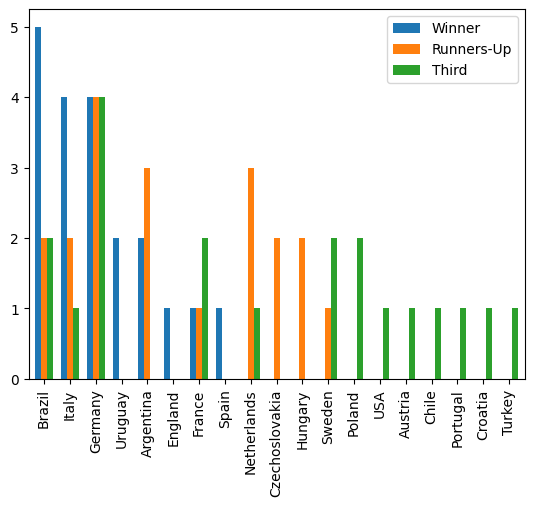

In [231]:
teams.plot(kind='bar',width=0.7)

<function matplotlib.pyplot.show(close=None, block=None)>

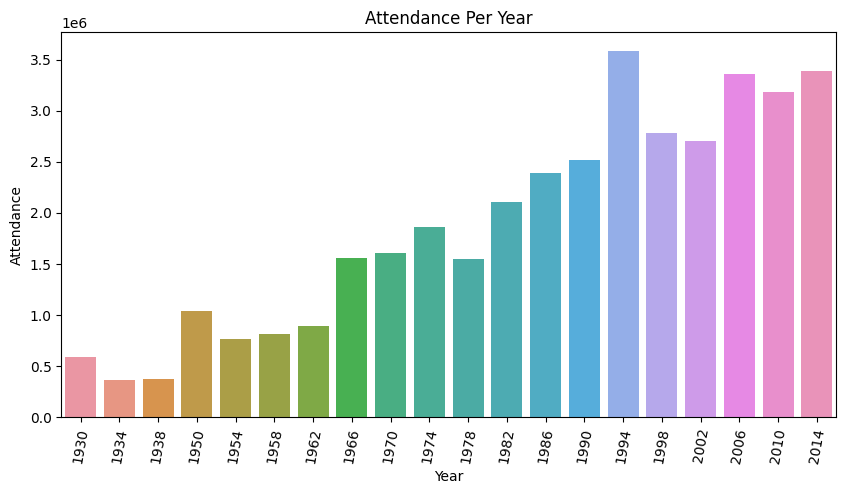

In [232]:
plt.figure(figsize=(10,5))
g = sns.barplot(data=cups,x='Year',y='Attendance')
plt.xticks(rotation = 80)
plt.title("Attendance Per Year")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

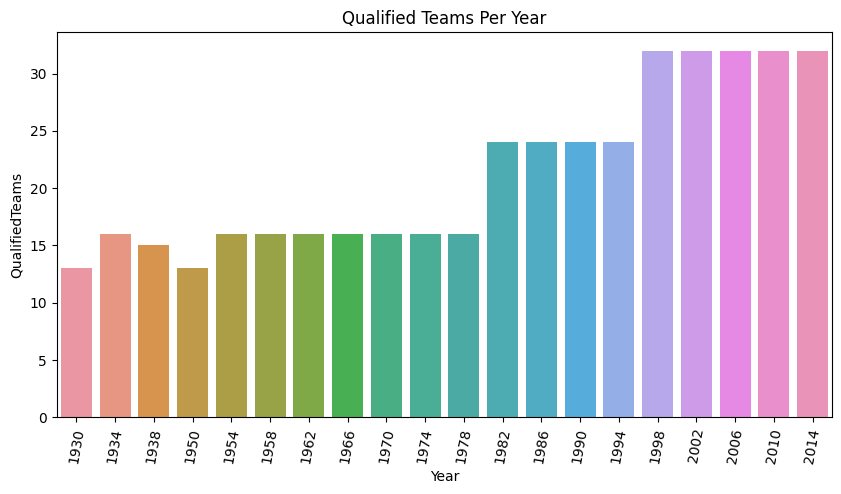

In [233]:
plt.figure(figsize=(10,5))
g = sns.barplot(data=cups,x='Year',y='QualifiedTeams')
plt.xticks(rotation = 80)
plt.title("Qualified Teams Per Year")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

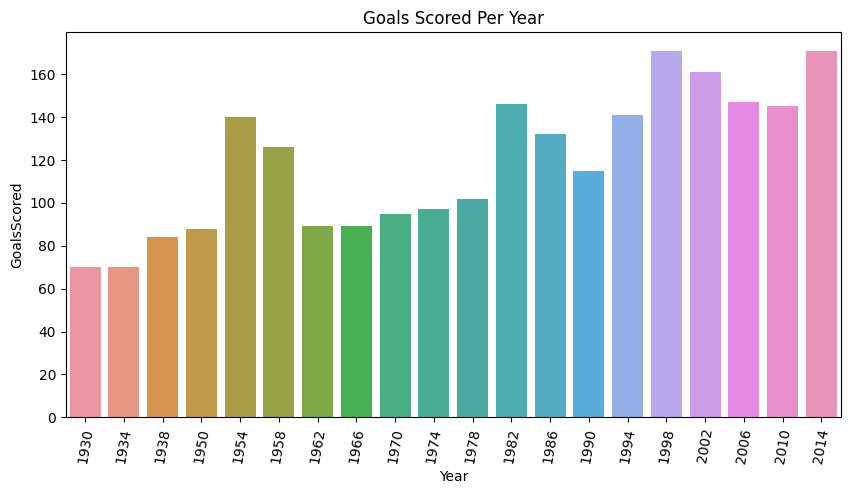

In [234]:
plt.figure(figsize=(10,5))
g = sns.barplot(data=cups,x='Year',y='GoalsScored')
plt.xticks(rotation = 80)
plt.title("Goals Scored Per Year")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

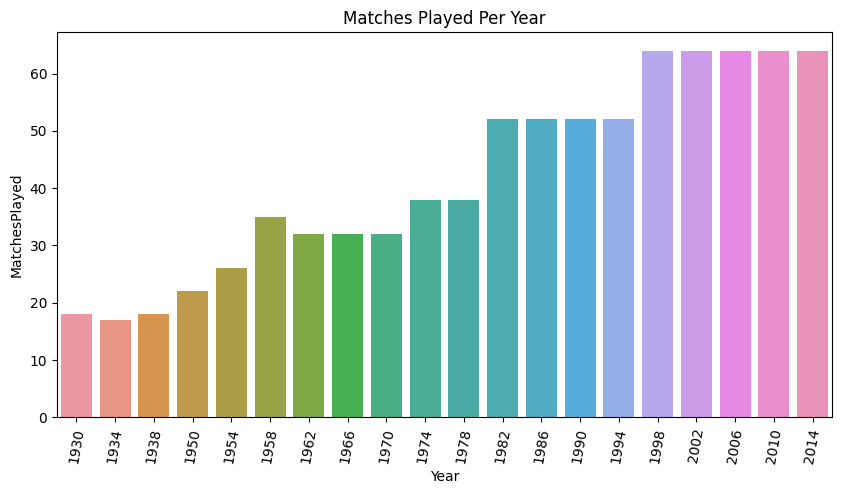

In [235]:
plt.figure(figsize=(10,5))
g = sns.barplot(data=cups,x='Year',y='MatchesPlayed')
plt.xticks(rotation = 80)
plt.title("Matches Played Per Year")
plt.show

In [236]:
#No. of hosts
len(cups['Country'].unique())

15

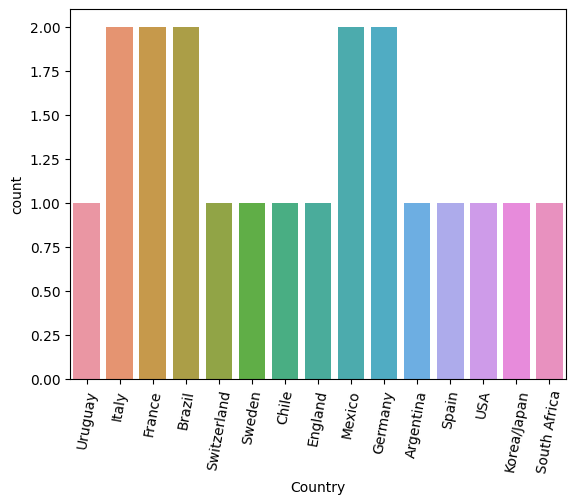

In [237]:
sns.countplot(data=cups,x='Country')
plt.xticks(rotation = 80)
plt.show()

In [309]:
# Goals Per Country
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

In [310]:
home.columns = ['Countries','Goals']

In [311]:
away.columns = ['Countries','Goals']

In [313]:
home = home.groupby('Countries').sum()

In [312]:
away = away.groupby('Countries').sum()

In [314]:
temp = home.merge(away,on='Countries',how='left').reset_index()

In [315]:
temp

,Countries,Goals_x,Goals_y
0,Algeria,5,8
1,Angola,0,1
2,Argentina,109,22
3,Australia,7,4
4,Austria,31,12
...,...,...,...
71,United Arab Emirates,0,2
72,Uruguay,62,18
73,Wales,2,2
74,Yugoslavia,42,18


In [316]:
temp.columns = ['Country','Home Goals','Away Goals']

In [317]:
temp['Total Goals'] = temp['Home Goals'] + temp['Away Goals']

In [318]:
temp

,Country,Home Goals,Away Goals,Total Goals
0,Algeria,5,8,13
1,Angola,0,1,1
2,Argentina,109,22,131
3,Australia,7,4,11
4,Austria,31,12,43
...,...,...,...,...
71,United Arab Emirates,0,2,2
72,Uruguay,62,18,80
73,Wales,2,2,4
74,Yugoslavia,42,18,60


In [328]:
temp = temp.sort_values(by='Total Goals',ascending=False)
temp[:20]

,Country,Home Goals,Away Goals,Total Goals
24,Germany,168,61,229
8,Brazil,176,45,221
2,Argentina,109,22,131
33,Italy,99,29,128
23,France,66,40,106
62,Spain,50,42,92
29,Hungary,73,14,87
41,Netherlands,49,37,86
72,Uruguay,62,18,80
22,England,54,25,79


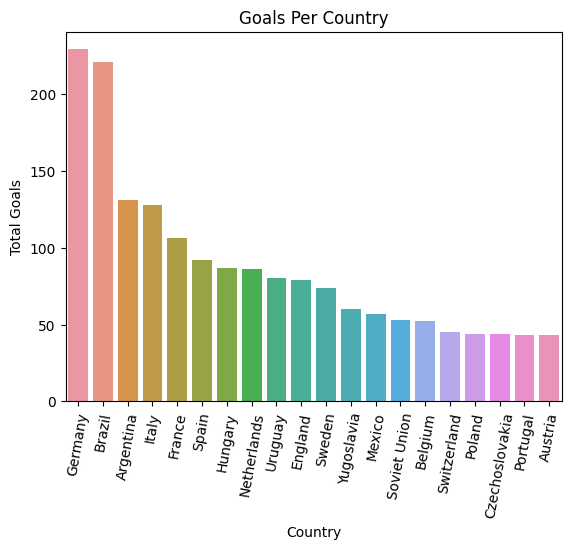

In [329]:
sns.barplot(data=temp[:20],x='Country',y='Total Goals')
plt.xticks(rotation = 80)
plt.title("Goals Per Country")
plt.show()